In [1]:
import numpy as np
import pandas as pd

# 让画图内置
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# 忽略版本号之类的warnings
import warnings
warnings.filterwarnings('ignore')
import os

# 数据导入

In [2]:
# 导入数据
original_data = pd.read_excel('JD_data\京东消费者分析数据.xlsx')

In [84]:
# 数据量
data = original_data.copy()
data.shape

(183828, 20)

In [85]:
data.head()

,customer_id,product_id,action_date,action_id,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,vender_id,fans_number,vip_number,shop_register_date,shop_category,shop_score
0,976695,328360,2018-03-05 08:52:00,10633744,PageView,5.0,W,2017-06-17,6,3.0,LukFook,2959,Bracelet,2017-10-05,4322,1159,36596,2017-07-04,Jewellery Accessories,9.043610
1,395399,141632,2018-03-20 10:55:00,5472028,PageView,4.0,M,2018-01-21,6,5.0,illuma,4203,Milk Power,2015-06-12,3563,2411,65893,2013-08-08,Mother and Infant,9.537151
2,1068082,5924,2018-04-01 13:56:00,3853455,PageView,6.0,W,2012-08-13,1,4.0,Li-Ning,8002,Badminton,2013-06-14,1457,213610,357580,2013-05-23,Outdoor Sports,9.571139
3,1068082,10723,2018-04-01 13:45:00,3853455,PageView,6.0,W,2012-08-13,1,4.0,Li-Ning,8002,Badminton,2011-07-19,1457,213610,357580,2013-05-23,Outdoor Sports,9.571139
4,735392,4559,2018-02-06 20:25:00,9434940,PageView,6.0,M,2009-09-15,7,5.0,Other,6944,Cookie,2015-11-16,355,63969,85597,2014-10-31,Food,9.665680


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183828 entries, 0 to 183827
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   customer_id             183828 non-null  int64         
 1   product_id              183828 non-null  int64         
 2   action_date             183828 non-null  datetime64[ns]
 3   action_id               183828 non-null  int64         
 4   type                    183828 non-null  object        
 5   age_range               183745 non-null  float64       
 6   gender                  183828 non-null  object        
 7   customer_register_date  183828 non-null  datetime64[ns]
 8   customer_level          183828 non-null  int64         
 9   city_level              183703 non-null  float64       
 10  brand                   183828 non-null  object        
 11  shop_id                 183828 non-null  int64         
 12  category                183828

In [6]:
# 有意义的数值型变量的信息
data.describe()[['age_range','customer_level','city_level','fans_number','vip_number','shop_score','action_date','customer_register_date','product_market_date','shop_register_date']] 

,age_range,customer_level,city_level,fans_number,vip_number,shop_score,action_date,customer_register_date,product_market_date,shop_register_date
count,183745.000000,183828.000000,183703.000000,1.838280e+05,1.838280e+05,183828.000000,183828,183828,183828,112474
mean,4.680073,4.965734,3.292701,6.925701e+04,1.012062e+05,5.716299,2018-03-08 03:19:10.532345344,2014-07-03 05:31:32.943403520,2016-04-18 23:16:38.524707840,2015-11-13 04:00:30.983160576
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,-1.000000,2018-02-01 00:00:00,2003-06-13 00:00:00,2008-05-16 00:00:00,2011-03-14 00:00:00
25%,5.000000,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000,2018-02-15 23:00:00,2012-07-30 00:00:00,2015-07-30 00:00:00,2014-11-21 00:00:00
50%,5.000000,6.000000,4.000000,4.612000e+03,1.330000e+04,9.311070,2018-03-07 21:22:30,2014-10-27 00:00:00,2016-10-25 00:00:00,2016-01-05 00:00:00
75%,6.000000,7.000000,4.000000,4.319000e+04,9.424900e+04,9.539181,2018-03-25 19:28:00,2016-07-21 00:00:00,2017-08-06 00:00:00,2017-03-09 00:00:00
max,6.000000,7.000000,6.000000,9.293487e+06,1.384168e+07,10.000000,2018-04-15 23:59:00,2018-04-15 00:00:00,2018-04-14 00:00:00,2018-04-12 00:00:00
std,1.526474,2.334717,1.411516,2.448230e+05,2.648308e+05,4.653295,NaN,NaN,NaN,NaN


- 问题：fans_number最大为 9293487， vip_number最大值为 13841676 是同一个shop 10393 

# 预处理

## 空值 

- shop_register_date 缺失值太多,在研究店铺相关问题时尽量不用

In [7]:
data.isnull().sum()

customer_id                   0
product_id                    0
action_date                   0
action_id                     0
type                          0
age_range                    83
gender                        0
customer_register_date        0
customer_level                0
city_level                  125
brand                         0
shop_id                       0
category                      0
product_market_date           0
vender_id                     0
fans_number                   0
vip_number                    0
shop_register_date        71354
shop_category                 0
shop_score                    0
dtype: int64

**age_range 空值处理**
- 可以看到 age_range 为 5 的最多，空值就用 5 填充。

In [8]:
data['age_range'].value_counts() # 5 最多

age_range
5.0    80064
6.0    59992
2.0    16077
1.0    14309
4.0    13296
3.0        7
Name: count, dtype: int64

In [86]:
data['age_range'].fillna(5, inplace=True)
data['age_range'].isnull().sum()   # 0

0

**city_level的空值处理**


In [87]:
data['city_level'].value_counts() # 4 最多
data['age_range'].fillna(4, inplace=True)


## 重复值

**action_id字段**
-  照理来说，action_id 应该是主键，表示每个人的行为编号唯一值

- 但是 action_id 却有很多重复值，这些重复的 action_id 对应的record却不是完全重复的，需要寻找新的主键

In [88]:
# action_id 也有重复值，不是主键
data['action_id'].value_counts()[0:10]

action_id
10439703    9176
5335532        7
9401782        7
9656978        6
355392         6
8220611        6
3022398        6
12053          6
898733         6
2680391        5
Name: count, dtype: int64

In [89]:
# action_id 重复但是记录却不完全重复
data.query('action_id == 10439703').iloc[:5,:]

,customer_id,product_id,action_date,action_id,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,vender_id,fans_number,vip_number,shop_register_date,shop_category,shop_score
89941,796801,171645,2018-02-07 18:45:00,10439703,Comment,2.0,M,2015-08-20,5,5.0,Huawei,9445,Phone,2013-05-11,3666,0,0,NaT,Electronics,0.0
89942,750076,230884,2018-03-19 14:19:00,10439703,Comment,5.0,M,2014-08-15,5,4.0,OPPO,3388,Phone,2012-03-26,3666,0,0,NaT,Electronics,0.0
89943,279373,171645,2018-03-22 16:04:00,10439703,Comment,6.0,M,2010-03-25,7,1.0,Huawei,9445,Phone,2013-05-11,3666,0,0,NaT,Electronics,0.0
89944,322424,171645,2018-03-19 08:51:00,10439703,Comment,5.0,M,2011-10-15,5,4.0,Huawei,9445,Phone,2013-05-11,3666,0,0,NaT,Electronics,0.0
89945,101163,220537,2018-02-11 00:38:00,10439703,Comment,5.0,W,2015-06-12,5,5.0,Apple,157,Phone,2013-04-26,3666,0,0,NaT,Electronics,0.0


**寻找符合主键**
- groupby(['customer_id', 'product_id','type','action_date']) 后的数据仅有 2 个重复值, 且这两个重复值除了action_id其他都一样
- 可以认为这4个字段组成一个符合主键 ，且这俩记录重复的，删掉即可
- 含义就是：用户 在某个时间 对商品 ，做了什么

In [90]:
# 用groupby找复合主键
grouped = data.groupby(['customer_id', 'product_id','type','action_date']).size()
grouped[grouped > 1]

customer_id  product_id  type      action_date        
767393       86843       PageView  2018-03-26 19:01:00    2
dtype: int64

In [91]:
data.query("customer_id == 767393 and product_id == 86843")
# 这两条记录除了action_id，其他都一样，说明：1.action_id是个傻逼， 2.这两条记录是重复值，应当要删掉

,customer_id,product_id,action_date,action_id,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,vender_id,fans_number,vip_number,shop_register_date,shop_category,shop_score
33413,767393,86843,2018-03-26 19:01:00,6861957,PageView,6.0,W,2014-02-12,1,4.0,Microsoft,4296,Xbox,2016-06-14,3666,0,0,NaT,Electronics,0.0
112372,767393,86843,2018-03-26 19:01:00,8915506,PageView,6.0,W,2014-02-12,1,4.0,Microsoft,4296,Xbox,2016-06-14,3666,0,0,NaT,Electronics,0.0


In [92]:
# 删除重复值
to_be_drop = data.query("customer_id == 767393 and product_id == 86843").iloc[0]
data.drop(to_be_drop.name, inplace=True)


In [93]:
# 确认删除情况
data.query("customer_id == 767393 and product_id == 86843")
grouped = data.groupby(['customer_id', 'product_id','type','action_date']).size()
grouped[grouped > 1]

Series([], dtype: int64)

# 异常值探查

**异常值探查**
- 探究内容
    - 指标：记录数（行数），用value_counts()/groupby(col).size，维度拆解的时候才是groupby(col).unique()
    - 字段取值: 取哪些值，取值范围，有没有不合规的取值（格式错误/乱码）
    - 取值分布: 不同类型取值有没有不合理的地方

- 分类变量：
    - 类别多（id 类字段）：唯一值数量，有没有格式不规范
    - 类别少（性别类字段）：类别分布（value_counts）

- 时间变量：唯一日期/年份数量，时间范围，按年/月/日的分布

- 连续变量：取值范围，分布


## 用户行为

**customer_id**  
- 去重后用户数: 140715


In [180]:
# 去重后用户数
data['customer_id'].nunique()

140715

**product_id**
- 去重后商品数: 52950

In [179]:
# 去重后商品数
data['product_id'].nunique()

52950

**action_date**  
- datetime类型，从2018-2-1到2018-4-15
- 74天 每天都有数据

In [19]:
# action_date探索
print("action_date的格式：")
print(data['action_date'].head(2),end='\n\n')

# 时间范围
print("最早日期：",data['action_date'].min().date())
print("最晚日期：",data['action_date'].max().date(),end='\n\n')

# 日期分布
data['action_date'].dt.date.sort_values().unique().shape[0]  # 74天 每天都有数据

action_date的格式：
0   2018-03-05 08:52:00
1   2018-03-20 10:55:00
Name: action_date, dtype: datetime64[ns]

最早日期： 2018-02-01
最晚日期： 2018-04-15



74

**action_id**
- 傻逼东西，没用

**type** 
- 行为类别，有PageView,Follow,SaveCart,Order,Comment这5种取值

- Order明显比saveCart多，这不符合常理
    - 发现 SaveCart 在 2018-4-8之后才有数据，可能是数据错误，也可能是4-8之后才有购物车功能。
    -  但是 4-8之后每天SaveCart都比除了PV之外的数据高，不太可能是新增的

- Follow数较小，应该指的是收藏店铺 ； Comment指的是评论商品，在购买商品之后 ；用户路径时只需要都不需要考虑 

- 需要过滤掉 4-8 之前的数据


In [20]:
# 行为类型的分布情况
print(data['type'].value_counts())

行为类型的分布情况
type
PageView     163953
Order         10698
Comment        4010
SavedCart      2987
Follow         2179
Name: count, dtype: int64


In [21]:
# 探究为什么SavedCart的次数比Order的次数少

# 新增一列 action_day，表示行为发生的日期
data['action_day']  = data['action_date'].apply(lambda x: x.date())

# 统计每天每个行为的次数
type_count = data.groupby(['action_day', 'type']).size().unstack()
type_count

# 找到有购物车的记录去日期
type_count[type_count['SavedCart'].isnull().apply(lambda x: not x)]


type,Comment,Follow,Order,PageView,SavedCart
action_day,,,,,
2018-04-08,70.0,37.0,156.0,1899.0,320.0
2018-04-09,70.0,32.0,169.0,2069.0,425.0
2018-04-10,71.0,26.0,156.0,2111.0,421.0
2018-04-11,75.0,30.0,162.0,2049.0,434.0
2018-04-12,58.0,31.0,146.0,1850.0,363.0
2018-04-13,65.0,34.0,146.0,1920.0,354.0
2018-04-14,56.0,35.0,159.0,1892.0,356.0
2018-04-15,50.0,33.0,135.0,1695.0,314.0


In [22]:
# 4-8之后的数据只有20474条
from datetime import date

recent_data = data[data['action_day']>=date(2018, 4, 8)]
recent_data.shape


(20474, 21)

## 用户信息

**age_range**
- 有 6 个年龄段，数字 1-7 代表
- 年龄段为 3 的记录/用户仅有 7 个

In [191]:
# 不同年龄段的记录数
print(data.value_counts('age_range').sort_index())

age_range
1.0    14309
2.0    16077
3.0        7
4.0    13296
5.0    80147
6.0    59991
Name: count, dtype: int64


In [188]:
# 不同年龄段的用户数
print(data.groupby('age_range')['customer_id'].nunique())

age_range
1.0    10261
2.0    11147
3.0        7
4.0    11845
5.0    63606
6.0    43849
Name: customer_id, dtype: int64


**gender**
- 性别：男M:120077，女W:63277，未知U:473

In [199]:
# 不同性别的记录数
data.value_counts('gender').sort_index()

gender
M    120077
U       473
W     63277
Name: count, dtype: int64

In [201]:
# 不同性别的用户数
print(data.groupby('gender')['customer_id'].nunique().sort_index())

gender
M    86080
U      448
W    54187
Name: customer_id, dtype: int64


**customer_level**
- 等级为 2，3，4 级的记录/用户明显少

In [202]:
# 不同会员级别的记录数
print(data.groupby('customer_level')['customer_id'].size())

customer_level
1    43252
2        3
3       66
4      108
5    44851
6    24132
7    71415
Name: customer_id, dtype: int64


In [205]:
# 不同会员级别的用户
print(data.groupby('customer_level')['customer_id'].nunique())

customer_level
1    35864
2        2
3       65
4      108
5    35160
6    21379
7    48137
Name: customer_id, dtype: int64


**city_level**
- 取值为 2 和 6 的明显少，可以考虑去掉

In [208]:
# 不同城市等级的记录数
print(data.groupby('city_level')['customer_id'].size())

city_level
1.0    39971
2.0     2349
3.0    46477
4.0    54319
5.0    40017
6.0      569
Name: customer_id, dtype: int64


In [207]:
# 不同城市等级的用户数
print(data.groupby('city_level')['customer_id'].nunique())

city_level
1.0    29990
2.0     1816
3.0    36284
4.0    41931
5.0    30150
6.0      433
Name: customer_id, dtype: int64


**customer_register_date** 
- 用户注册的时间范围：2003-06-13 ~ 2018-04-15 
- 注册年份分布合理，非重复日期数 4104 （10年多，合理）

In [211]:
# 时间范围
print("最早日期：",data['customer_register_date'].min().date())
print("最晚日期：",data['customer_register_date'].max().date(),end='\n\n')

最早日期： 2003-06-13
最晚日期： 2018-04-15



In [213]:
# 不同年份注册的记录数
data.groupby(data['customer_register_date'].dt.year)['customer_id'].size()

customer_register_date
2003       11
2004       40
2005       77
2006      200
2007      485
2008     1882
2009     4391
2010     9821
2011    16845
2012    21406
2013    19854
2014    21473
2015    26422
2016    26500
2017    25834
2018     8586
Name: customer_id, dtype: int64

In [214]:
# 不同年份注册的用户数
data.groupby(data['customer_register_date'].dt.year)['customer_id'].nunique()

customer_register_date
2003        7
2004       30
2005       47
2006      136
2007      325
2008     1282
2009     3083
2010     6851
2011    12206
2012    15765
2013    14983
2014    16454
2015    20882
2016    21164
2017    20411
2018     7089
Name: customer_id, dtype: int64

In [209]:
# 去重后日期数
data['customer_register_date'].nunique()

4104

## 商品

**brand**
- 72个产品品牌

In [216]:
# 产品品牌数
data['brand'].nunique()

72

In [42]:
# 不同品牌的记录数量分布
brand_counts = data['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'count']

# 创建动态图表
fig = px.bar(brand_counts, x='brand', y='count', title='Brand Frequency', 
             labels={'count': 'Count', 'brand': 'Brand'},
             text='count')
fig.update_layout(
    xaxis=dict(tickangle=45)
)
# 显示图表
fig.show()

In [223]:
brand_counts = data.groupby(['brand'])['product_id'].nunique().sort_values(ascending=False).reset_index()
brand_counts.columns = ['brand', 'count']
brand_counts

,brand,count
0,Other,15859
1,Lipton,3651
2,Apple,2327
3,Huawei,2255
4,Midea,1513
...,...,...
67,Vichy,53
68,Oreo,49
69,KOPIKO,43
70,Calbee,38


In [224]:
# 不同品牌的商品数量分布
brand_counts = data.groupby(['brand'])['product_id'].nunique().sort_values(ascending=False).reset_index()
brand_counts.columns = ['brand', 'count']

# 创建动态图表
fig = px.bar(brand_counts, x='brand', y='count', title='Brand Frequency', 
             labels={'count': 'Count', 'brand': 'Brand'},
             text='count')
fig.update_layout(
    xaxis=dict(tickangle=45)
)
# 显示图表
fig.show()

**category**
- 53 个产品种类

In [215]:
# 产品种类数
data['category'].nunique()

53

In [43]:
brand_counts = data['category'].value_counts().reset_index()
brand_counts.columns = ['category', 'count']

# 创建动态图表
fig = px.bar(brand_counts, x='category', y='count', title='category Frequency', 
             labels={'count': 'Count', 'category': 'category'},
             text='count')
fig.update_layout(
    xaxis=dict(tickangle=45)
)

# 显示图表
fig.show()

**product_market_date**
- 产品上市日期


In [44]:

# 时间范围
print("最早日期：",data['product_market_date'].min().date())
print("最晚日期：",data['product_market_date'].max().date(),end='\n\n')

# 商品上架时间按年分布
print("商品上架时间按年分布")
print(data.groupby(data['product_market_date'].dt.year)['product_id'].nunique())

最早日期： 2008-05-16
最晚日期： 2018-04-14

商品上架时间按年分布
product_market_date
2008        3
2009       40
2010      211
2011      285
2012      709
2013     1644
2014     3050
2015     6182
2016    11988
2017    23757
2018     5081
Name: product_id, dtype: int64


## 店铺信息

**shop_id** 
- 作为店铺信息的主键，共有6086个店铺


In [146]:
# 去重店铺数
data['shop_id'].nunique()

6086

In [145]:
# shop_id 是这几个字段的主键
""" 
一个shop_id 只会对应 1 个vender_id，1 个fans_number，1 个vip_number，1 个shop_register_date，1 个shop_score 
下边筛选的 对应字段的唯一值大于1的 情况
"""
shopgb = data.groupby(['shop_id'])[['vender_id','fans_number','vip_number','shop_register_date','shop_score']].nunique()
(shopgb > 1).sum() 

vender_id             0
fans_number           0
vip_number            0
shop_register_date    0
shop_score            0
dtype: int64

In [147]:
# 判断条件不能写 != 1，因为 shop_register_date 有空值，对应的nunique是 0 , 即1个shop_id 对应0个注册日期
shopgb = data.groupby(['shop_id'])[['shop_register_date']].nunique()
shopgb.query('shop_register_date != 1').sum()

shop_register_date    0
dtype: int64

**vender_id**
- vender_id 不能作为主键，因为 vender_id == 3666 的记录有很多条，且对应的都是register_date 为空的记录
- 可以不要这一列

In [149]:
# vender_id 不能是主键
vendergb = data.groupby(['vender_id'])[['shop_id','fans_number','vip_number','shop_register_date','shop_score']].nunique()
(vendergb > 1).sum()

shop_id               1
fans_number           0
vip_number            0
shop_register_date    0
shop_score            0
dtype: int64

In [153]:
temp = data.groupby(['vender_id'])[['shop_id']].nunique()
temp.query('shop_id != 1') # vender_id  == 3666 

,shop_id
vender_id,
3666,516


In [154]:
data.query('vender_id == 3666')

,customer_id,product_id,action_date,action_id,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,vender_id,fans_number,vip_number,shop_register_date,shop_category,shop_score
5,1093882,339554,2018-02-04 01:36:00,7774014,PageView,5.0,M,2014-05-28,7,4.0,HP,4433,Notebook,2017-12-21,3666,0,0,NaT,Electronics,0.0
10,41753,134156,2018-03-18 00:06:00,5379614,PageView,6.0,M,2017-07-06,5,1.0,Sumsung,7082,Phone,2014-07-01,3666,0,0,NaT,Electronics,0.0
12,1432607,301377,2018-02-09 23:47:00,1663953,PageView,2.0,M,2010-07-24,7,1.0,Huawei,1107,Phone,2011-11-17,3666,0,0,NaT,Electronics,0.0
15,319978,168054,2018-04-04 15:14:00,6452299,PageView,6.0,W,2014-01-06,5,4.0,DELL,2216,Notebook,2017-04-19,3666,0,0,NaT,Electronics,0.0
17,77328,220460,2018-03-30 21:12:00,7084383,PageView,5.0,M,2015-10-21,6,1.0,Sony,7141,Digital Camera,2016-12-27,3666,0,0,NaT,Electronics,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183820,565379,206484,2018-02-03 13:21:00,55982,PageView,4.0,W,2017-12-23,6,1.0,Apple,5523,Tablet,2017-05-05,3666,0,0,NaT,Electronics,0.0
183822,926824,353584,2018-03-17 21:55:00,3019875,PageView,5.0,W,2014-05-19,5,4.0,Apple,5523,Phone,2016-10-11,3666,0,0,NaT,Electronics,0.0
183825,1377001,199816,2018-03-14 21:17:00,10747232,PageView,6.0,M,2015-05-23,7,4.0,Huawei,5332,Phone,2017-08-11,3666,0,0,NaT,Electronics,0.0
183826,1057196,286812,2018-04-07 11:54:00,5702636,PageView,6.0,W,2017-10-12,6,4.0,Other,8451,Phone,2013-03-19,3666,0,0,NaT,Electronics,0.0


**shop_category** 
- 店铺主营，有 9 种

In [157]:
# 不同类型的记录数
data['shop_category'].value_counts()

shop_category
Electronics                    72705
Clothes                        29990
Beauty Makeup                  29617
Food                           25095
Household Eletric Appliance    10283
Furniture                       5869
Jewellery Accessories           5062
Outdoor Sports                  3853
Mother and Infant               1353
Name: count, dtype: int64

In [158]:
# 不同类型的店铺数
data.groupby('shop_category')['shop_id'].nunique()


shop_category
Beauty Makeup                   756
Clothes                         797
Electronics                     820
Food                           1126
Furniture                       905
Household Eletric Appliance    1020
Jewellery Accessories           302
Mother and Infant               231
Outdoor Sports                  129
Name: shop_id, dtype: int64

**shop_register_date** 
- 开店时间
- 71354个空值

In [ ]:
print("空值：",data['shop_register_date'].isnull().sum())

空值： 71353


In [ ]:
# 没有注册时间的店铺数量
data.query('shop_register_date.isnull()')['shop_id'].nunique()

516

**fans_number & vip_number**
- 粉丝数 和 会员数
- 会员数比粉丝数多是常态，跟字段定义有关，暂时不管
- vip_number和fans_number 长尾分布，有很离谱的离群值

In [109]:
print("粉丝数小于等于0的记录数：",(data['fans_number']<=0).sum())
print("vip数小于等于0的记录数：",(data['vip_number']<=0).sum())

粉丝数小于等于0的记录数： 71354
vip数小于等于0的记录数： 71356


In [103]:
# 粉丝数比会员数少的店铺 
shop_vip = data.groupby('shop_id').agg({'fans_number':'max','vip_number':'max'}) # 6086
data.groupby('shop_id').agg({'fans_number':'max','vip_number':'max'}).query('fans_number > vip_number') # 1380家店铺

,fans_number,vip_number
shop_id,,
3,278,173
11,22101,7150
17,24987,20523
26,5643,802
30,21618,1276
...,...,...
10370,1091,655
10376,53959,13290
10377,11491,7125


In [106]:
# vip_number 分布情况
"""
vip数为 1000w 级的店，只有一家，400w 级的有 2 家， 100w~400w 级的有 14 家， 其他都是100w 级以下的店。
"""
shop_vip.sort_values(by='vip_number',ascending=False).head(20)  


,fans_number,vip_number
shop_id,,
10393,9293487,13841676
4241,3748112,4868959
4207,140298,4273637
2091,136900,2201912
9030,752917,1942664
661,721471,1812543
8351,3346267,1665629
2149,1569828,1429619
1127,112062,1389637


In [107]:
# fans_number 分布情况
"""
粉丝数为 900w 级的店，有1家， 100w~300w 级的有 7 家， 其他都是100w 级以下的店。
"""
shop_vip.sort_values(by='fans_number',ascending=False).head(20)  

,fans_number,vip_number
shop_id,,
10393,9293487,13841676
4241,3748112,4868959
8351,3346267,1665629
1912,2511707,175996
3790,2171510,562436
2149,1569828,1429619
931,1377103,1109666
3494,1371624,47026
9695,996774,633437


**shop_score**
- 有 71354 条记录是 0 分 ，这些都是 register_date 为空的记录
- 有 1524 条记录是 -1 分 ，没有什么特点 (店铺被封了？)

In [159]:
# 店铺评分为0的记录数
(data['shop_score']==0).sum()

71354

In [160]:
# 店铺评分小于0的
data.query('shop_score < 0')

,customer_id,product_id,action_date,action_id,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,vender_id,fans_number,vip_number,shop_register_date,shop_category,shop_score
46,91713,210500,2018-02-01 21:31:00,9165034,PageView,5.0,M,2012-04-22,5,5.0,Microsoft,10319,Xbox,2015-08-14,7967,746,2049,2013-12-23,Electronics,-1.0
243,1534532,68145,2018-03-07 17:51:00,7220364,PageView,5.0,W,2018-01-19,6,1.0,Sony,9369,Digital Camera,2016-05-19,5381,6782,84274,2014-10-10,Electronics,-1.0
298,529495,231739,2018-02-10 13:23:00,8572809,PageView,5.0,M,2016-01-25,1,1.0,Sumsung,9264,Phone,2017-11-01,9672,18909,299218,2014-12-22,Electronics,-1.0
478,89893,323338,2018-02-21 23:01:00,6332577,PageView,5.0,M,2015-12-28,1,1.0,Redmi,6698,Phone,2016-07-15,5024,3529,11373,2016-07-01,Electronics,-1.0
482,512409,90212,2018-03-05 21:30:00,4481655,PageView,5.0,M,2018-03-05,6,5.0,Huawei,1941,Phone,2017-05-16,2541,4043,24245,2017-03-27,Electronics,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183269,53337,90369,2018-04-09 20:39:00,3432735,PageView,6.0,M,2012-01-13,7,3.0,Lipton,7130,Tea,2018-03-22,876,10291,65,2016-06-07,Food,-1.0
183329,70468,13648,2018-03-10 21:21:00,7262340,PageView,6.0,W,2016-01-26,7,3.0,Redmi,2172,Phone,2017-05-06,2395,12342,16092,2015-09-09,Electronics,-1.0
183425,329777,54042,2018-02-09 18:45:00,6475848,PageView,6.0,M,2013-06-17,5,3.0,Microsoft,8373,Xbox,2017-12-11,3978,11726,463,2017-10-26,Electronics,-1.0
183506,1412033,55842,2018-03-05 21:02:00,3796970,PageView,6.0,M,2015-03-11,7,3.0,Lenovo,10249,Notebook,2016-08-22,8358,1290,5786,2016-06-17,Electronics,-1.0


In [165]:
# 除了 为 0 和 -1 的，其他都是在 8.8 以上的
data.query('shop_score > 1')['shop_score'].min()

8.81632

<Axes: ylabel='Frequency'>

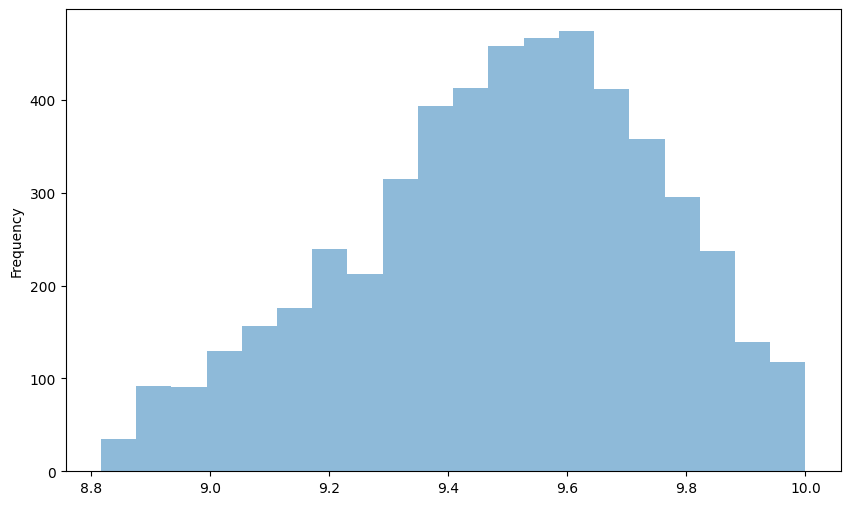

In [176]:
# 正常的店铺分数分布情况
shop_score_gb = data.groupby('shop_id')['shop_score'].max()
shop_score_gb[shop_score_gb > 0].plot(kind='hist', bins=20, figsize=(10, 6), alpha=0.5)

In [178]:
# 不正常的店铺情况
shop_score_gb[shop_score_gb <= 0].value_counts()

shop_score
 0.0    517
-1.0    358
Name: count, dtype: int64

# 异常值处理